# scram2 demonstration

- Using the [scram2_docker container](https://hub.docker.com/r/sfletcher/scram2_docker/)
- Notebook started in the project root directory via:
```
docker run -it --rm  -v ${PWD}:/work -p 8888:8888 sfletcher/scram2_docker
```

#### Set up the Jupyter environment (optional)

In [1]:
%matplotlib inline
#To display pandas dataframes inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas

### Process FASTQ files to collapsed FASTA
- FASTX-Toolkit from the Bioconda channel is installed in the scram2_docker container
- Full usage instructions are on [the Hannon Lab site](http://hannonlab.cshl.edu/fastx_toolkit/)

#### Example file and directory structure on the host

In [2]:
! tree

.
├── license
├── out_dir
├── ref
│   ├── GFP.fa
│   └── TAIR10_transposable_elements.fa
├── scram2_demonstration.ipynb
└── seq
    ├── treatment_a_rep1.fa
    ├── treatment_a_rep2.fa
    ├── treatment_a_rep3.fa
    ├── treatment_b_rep1.fa
    ├── treatment_b_rep2.fa
    └── treatment_b_rep3.fa

3 directories, 10 files


#### scram2 help
- the scram2 aligner is in the container path

In [3]:
!scram2 -h

The ultra-fast siRNA aligner v0.1.4

Usage:
  scram2 [command]

Available Commands:
  compare     Compare normalised alignment counts and standard errors for 2 read file sets
  help        Help about any command
  profile     Align reads of length l from 1 read file set to all sequences in a reference file

Flags:
      --adapter string         3' adapter sequence to trim - FASTA & FASTQ only (default "nil")
  -r, --alignTo string         path/to/FASTA reference file
  -1, --fastxSet1 string       comma-seperated path/to/read file set 1. GZIPped files must have .gz file extension
  -h, --help                   help for scram2
  -l, --length string          comma-seperated read (sRNA) lengths to align
      --maxLen int             Maximum read length to include for RPMR normalization (default 32)
      --minCount float         Minimum read count for alignment and to include for RPMR normalization (default 1)
      --minLen int             Minimum read length to include for RPMR normali

## Comparison alignments and scatter plots

- For comparing two treatments (e.g. wild-type verses mutant) - the output is the mean and standard error of the total alignments to each reference sequence
- By default, the alignment count of multi-mapping reads is split even between the number of loci aligned to (both within and among all reference sequences).  The -nosplit flag shows the maximum possible alignment count at each loci 
- Alignments are carried out seperately for each small RNA size (read length) entered in the -nt filed
- The read length aligned is appended to the alignment csv file name

#### Alignment of 2 x 3 replicates (treatment A & treatment B) x 3 read lengths (21, 22, 24 nt) to Arabidopsis transposable elements  FASTA reference file
- Artificial read files are in collapsed FASTA format (generated by FASTX-Toolkit)
- FASTQ or FASTA (non-collapsed) can also be used (with the readFileType flag).  GZIPped input is fine. 3' Adapters can be trimmed on the fly from FASTA and FASTQ reads (with the adapter flag).  Adapter trimming is quite stringent (12 5'adapter nucleotides must be all present, or the read is rejected), so a dedicated software package may be desirable.  

In [4]:
!scram2 compare -r ref/TAIR10_transposable_elements.fa \
    -1 seq/treatment_a_rep1.fa,seq/treatment_a_rep2.fa,seq/treatment_a_rep3.fa \
    -2 seq/treatment_b_rep1.fa,seq/treatment_b_rep2.fa,seq/treatment_b_rep3.fa \
    -l 21,22,24 -o out_dir/treatment_a_vs_b 
    
    

Single read file seq/treatment_a_rep1.fa loaded:  1.273687344s
Single read file seq/treatment_a_rep2.fa loaded:  1.570184816s
Single read file seq/treatment_a_rep3.fa loaded:  1.610358303s
Read file set processed:  2.224823631s
Single read file seq/treatment_b_rep1.fa loaded:  1.710153874s
Single read file seq/treatment_b_rep2.fa loaded:  1.926231426s
Single read file seq/treatment_b_rep3.fa loaded:  1.951371779s
Read file set processed:  2.530838801s
No. of reference sequences:  31189
Reference file processed:  1.354963481s
Read file set aligned to reference/s:  1.183330473s
Aligned read set processed (split count):  11.605181ms
Read file set aligned to reference/s:  1.1047823s
Aligned read set processed (split count):  9.680549ms
Alignments combined:  1.777463ms
Written to file:  34.425875ms
Read file set aligned to reference/s:  1.210230697s
Aligned read set processed (split count):  15.786561ms
Read file set aligned to reference/s:  1.662639786s
Aligned read set processed (split co

#### The normalised alignment count (reads per million reads) count and standard error for the two treatments (columns) aligned to each reference sequence (rows) are generated
- data can be easily imported and manipulated in a Pandas dataframe

In [5]:
comparison_alignment = pandas.read_csv('out_dir/treatment_a_vs_b_21.csv')

In [6]:
comparison_alignment.head()

,Header,Mean count 1,Std. err 1,Mean count 2,Std. err 2
0,AT5TE45405|+|12819513|12819566|ATDNA12T3_2|DNA...,1.237,0.020006,1.175,0.040990
1,AT5TE37495|+|10268981|10271170|ATREP6|RC/Helit...,0.295,0.009016,0.356,0.063315
2,AT5TE44770|+|12639602|12650823|ATHILA2|LTR/Gyp...,0.004,0.000621,0.004,0.000402
3,AT5TE48415|-|13619951|13621994|ATREP5|RC/Helit...,0.337,0.009116,0.312,0.012481
4,AT4TE21295|-|5127101|5135152|ATGP1|LTR/Gypsy|8...,0.327,0.022175,0.365,0.055807


### scram2_plot.py compare can be used to generate interactive scatter plots using the bokeh plotting library

In [7]:
%run /scram2_plot/scram2_plot.py compare -h

usage: scram2_plot.py compare [-h] [-plot_type PLOT_TYPE] [-a ALIGNMENT]
                              [-l LENGTH] [-xlab [X_LABEL [X_LABEL ...]]]
                              [-ylab [Y_LABEL [Y_LABEL ...]]] [-html] [-pub]
                              [-png]

optional arguments:
  -h, --help            show this help message and exit
  -plot_type PLOT_TYPE, --plot_type PLOT_TYPE
                        Bokeh plot type to display (log, log_error or all)
  -a ALIGNMENT, --alignment ALIGNMENT
                        sRNA alignment file prefix used by SCRAM2 profile
                        (i.e. exclude _21.csv, _22.csv, _24.csv)
  -l LENGTH, --length LENGTH
                        Comma-seperated list of sRNA lengths to plot. SCRAM2
                        alignment files must be available for each sRNA length
  -xlab [X_LABEL [X_LABEL ...]], --x_label [X_LABEL [X_LABEL ...]]
                        x label - corresponds to -s1 treatment in SCRAM2
                        arguments
  -yl

#### 3 plot types - log, log + standard error bars (deafult) and linear
- plots are interactive - hover over each point of interest to identify header
- 21nt plots are gree, 22nt pink, and 24nt blue
- standard error bars are shown (x -> Treatment A, y -> Treatment b) in the default log + se bars plot
- linear plot ellipses also show standard error - x-plane = Treatment A s.e. & y-plane = Treatment B s.e.

#### Log plot with x,y standard error bars (default plot)

In [8]:
%run /scram2_plot/scram2_plot.py compare -a out_dir/treatment_a_vs_b -l 24 -xlab Treatment A (RPMR) -ylab Treatment B (RPMR)

#### 24 nt plots are blue, other lengths are black

## Profile alignments and profile plots
- For aligning reads from one of more replicate read files to one or more refrence sequences
- The reference sequence header, reference sequence length, read aligned, position, count, standard error and the number of loci aligned to (Times aligned) are returned
- Alignments to the complementary strand are shown as negative counts at each position
- The alignment position is the distance from the 5' end of the reference sequence (with 1 the first position).  This distance is to the 5' end of the read of it aligns in the forward direction and the 3' end if it aligns in the reverse position.

#### Alignment of a set of 3 replicates (treatment A) x 3 read lengths (21, 22, 24 nt) to reference sequences in the Arabidopsis transposable elements FASTA file (31,189 sequences)

In [9]:
!scram2 profile -r ref/TAIR10_transposable_elements.fa \
    -1 seq/treatment_a_rep1.fa,seq/treatment_a_rep2.fa,seq/treatment_a_rep3.fa \
    -l 21,22,24 -o out_dir/treatment_a_profile
    

Single read file seq/treatment_a_rep3.fa loaded:  742.265853ms
Single read file seq/treatment_a_rep1.fa loaded:  750.957276ms
Single read file seq/treatment_a_rep2.fa loaded:  775.511702ms
Read file set processed:  1.525344208s
No. of reference sequences:  31189
Reference file processed:  280.285148ms
Read file set aligned to reference/s:  1.608962325s
Alignments processed:  14.895105ms
Written to file:  199.606375ms
Read file set aligned to reference/s:  1.468714675s
Alignments processed:  18.146331ms
Written to file:  182.175694ms
Read file set aligned to reference/s:  1.316610923s
Alignments processed:  179.202312ms
Written to file:  2.297423705s


In [10]:
comparison_alignment = pandas.read_csv('out_dir/treatment_a_profile_21.csv')
comparison_alignment.head()

,Header,len,sRNA,Position,Count,Std. Err,Times aligned
0,AT1TE52125|-|15827287|15838845|ATHILA2|LTR/Gyp...,11559,AAAAGGTCAAGAGACAAAGAT,3237,-0.004,0.000621,70
1,AT1TE52125|-|15827287|15838845|ATHILA2|LTR/Gyp...,11559,TAATCCGGATTTCTCTTTATC,4253,0.003,0.000009,99
2,AT1TE52125|-|15827287|15838845|ATHILA2|LTR/Gyp...,11559,AGAAAACCTACTGTAAACTGT,11514,-0.068,0.008258,5
3,AT1TE53750|-|16325184|16327367|ATREP3|RC/Helit...,2184,ACTAGATTTTAACCCGCGGTA,65,0.002,0.000265,164
4,AT1TE53750|-|16325184|16327367|ATREP3|RC/Helit...,2184,AAAAATAAATCGTCCCGCGGT,87,-0.007,0.000024,37


### scram2_plot.py profileplots can be used to generate plots using the matplotlib plotting library
- All profiles that meet the search criterea will be displayed.  This includes and search term in the reference header and those with a minimum alignment count in the most abundent read length (for multi plots) is over the cutoff (to filter out low abundence background alignments)  
- multi plots require 21, 22 and 24nt alignment input files (as these siRNA lengths are commonly plotted together)
- single plots plot one read length

In [11]:
%run /scram2_plot/scram2_plot.py profile -h

usage: scram2_plot.py profile [-h] [-a ALIGNMENT] [-cutoff CUTOFF]
                              [-s [SEARCH [SEARCH ...]]] [-l LENGTH]
                              [-ylim YLIM] [-win WIN] [-pub] [-png]

optional arguments:
  -h, --help            show this help message and exit
  -a ALIGNMENT, --alignment ALIGNMENT
                        sRNA alignment file prefix used by SCRAM2 profile
                        (i.e. exclude _21.csv, _22.csv, _24.csv)
  -cutoff CUTOFF, --cutoff CUTOFF
                        Min. alignment RPMR from the most abundant profile (if
                        multi) to generate plot
  -s [SEARCH [SEARCH ...]], --search [SEARCH [SEARCH ...]]
                        Full header or substring of header
  -l LENGTH, --length LENGTH
                        Comma-separated list of sRNA lengths to plot. SCRAM2
                        alignment files must be available for each sRNA length
  -ylim YLIM, --ylim YLIM
                        +/- y axis limit
  -win WIN,

#### 21, 22 and 24 nt profile plots with the search term "helitron"

Loading out_dir/treatment_a_profile_21.csv 

Loading out_dir/treatment_a_profile_22.csv 

Loading out_dir/treatment_a_profile_24.csv 

Extracting headers

AT3TE41655|+|10008501|10009413|ATREP5|RC/Helitron|913 bp


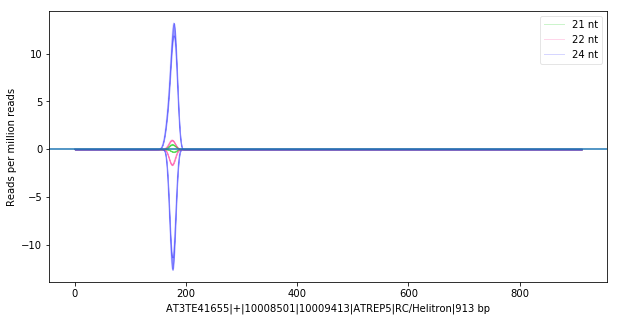

AT5TE60080|+|16641990|16642980|ATREP10D|RC/Helitron|991 bp


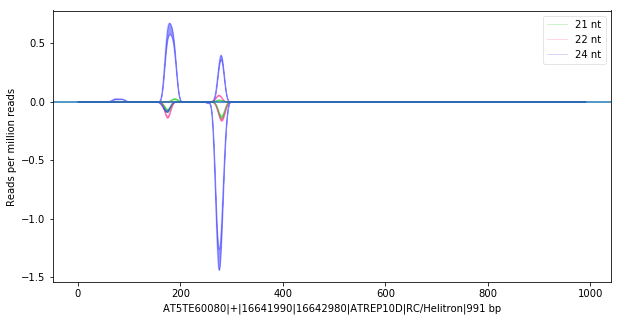

AT3TE33205|-|7920884|7922456|ATREP10B|RC/Helitron|1573 bp


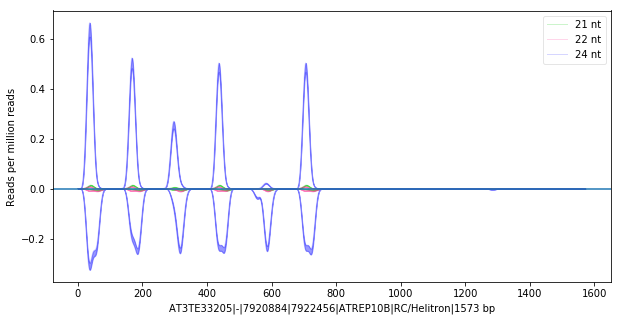

AT2TE22655|+|5607445|5607739|ATREP10A|RC/Helitron|295 bp


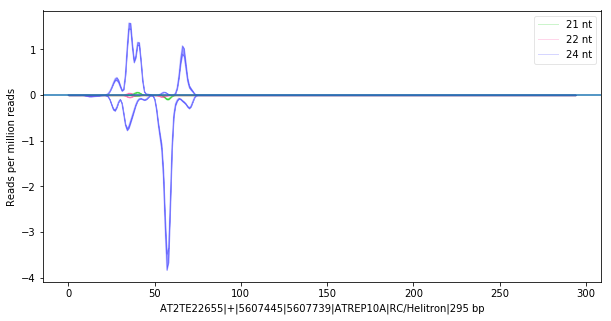

AT4TE60630|-|12956832|12957720|ATREP3|RC/Helitron|889 bp


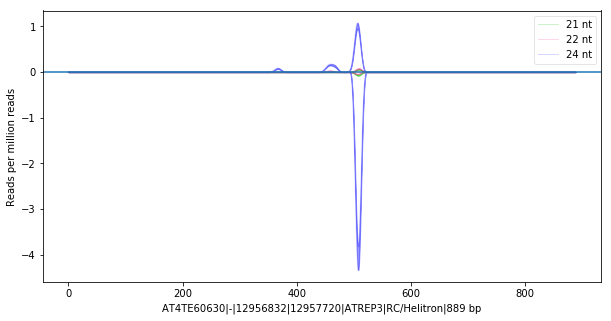

In [12]:
%run /scram2_plot/scram2_plot.py profile -s helitron \
    -a out_dir/treatment_a_profile -l 21,22,24\
    -cutoff 30

#### Alignment to GFP example

In [13]:
!scram2 profile -r ref/GFP.fa \
    -1 seq/treatment_a_rep1.fa,seq/treatment_a_rep2.fa,seq/treatment_a_rep3.fa \
    -l 21,22,24 -o out_dir/treatment_a_profile_GFP

Single read file seq/treatment_a_rep1.fa loaded:  787.946698ms
Single read file seq/treatment_a_rep2.fa loaded:  799.034063ms
Single read file seq/treatment_a_rep3.fa loaded:  853.638994ms
Read file set processed:  1.514967647s
No. of reference sequences:  1
Reference file processed:  41.829896ms
Read file set aligned to reference/s:  1.346903ms
Alignments processed:  1.047939ms
Written to file:  7.314098ms
Read file set aligned to reference/s:  633.322µs
Alignments processed:  541.471µs
Written to file:  3.86489ms
Read file set aligned to reference/s:  467.678µs
Alignments processed:  318.161µs
Written to file:  2.638256ms


#### 21, 22 and 24 nt profile plots with the search term "GFP"

Loading out_dir/treatment_a_profile_GFP_21.csv 

Loading out_dir/treatment_a_profile_GFP_22.csv 

Loading out_dir/treatment_a_profile_GFP_24.csv 

Extracting headers

GFP


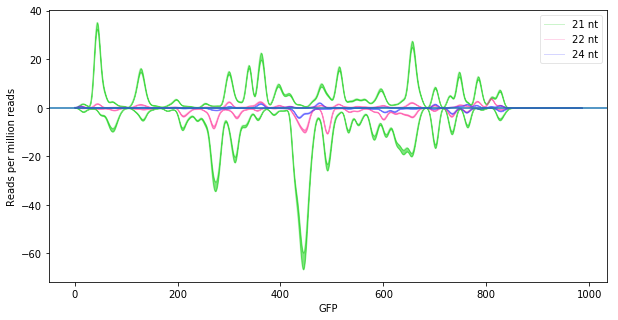

In [14]:
%run /scram2_plot/scram2_plot.py profile -s GFP \
    -a out_dir/treatment_a_profile_GFP -l 21,22,24

#### 22 nt profile plots with the search term "GFP"

Loading out_dir/treatment_a_profile_GFP_22.csv 

Extracting headers

GFP


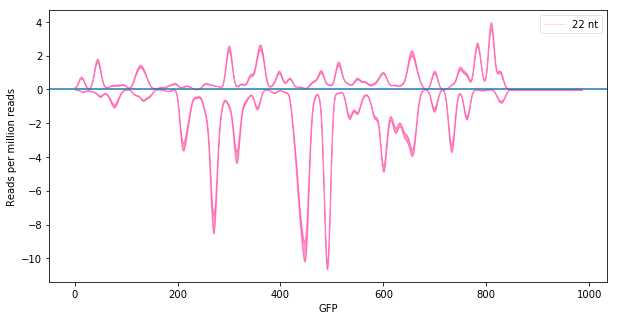

In [15]:
%run /scram2_plot/scram2_plot.py profile -s GFP \
    -a out_dir/treatment_a_profile_GFP -l 22